<a href="https://colab.research.google.com/github/Shashank-Holla/TSAI-EVA4/blob/master/Session10_LearningRate/main_with_LRFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting up environment

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd '/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10/'

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10


In [3]:
ls

data/                                  main_with_LRFinder.ipynb
Execute.ipynb                          metrics/
gradcam/                               models/
grad_cam_missclassified.jpg            __pycache__/
GraphsForLearning.ipynb                test.py
ImageAugmentation_Albumentation.ipynb  train.py
lr_finder/                             transform_albumentation.py
mainfile.py                            Transform_Filecall.ipynb
main.ipynb                             transform.py
main_quizDNN.ipynb


##Import libraries

In [4]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-62609og4
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-62609og4
     |████████████████████████████████| 634kB 9.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=8c83a9e6fa3d1c88613c9049da930c5deea14ad3bf599c0f430b4dff5a90ac70
  Stored in directory: /tmp/pip-ephem-wheel-cache-ffbgif1d/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=2ade45fdb1c703cb5e0bd30ec8a9903ee2cde335c1308131f9ce429b49b838f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ffbgif1d/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

## Import modules

In [5]:
#To reload custom pac
import autoreload
# %load_ext autoreload
%reload_ext autoreload
%autoreload

#import all necessary .py files
from train import train
from test import test


# Torchvision transforms
#from transform import transform

# Albumentations transform
from transform_albumentation import transform
# Residing place of DNN models
from models import *
# For graphs and incorrect image sample
from metrics import metrics, image_utilities

# Gradient Class Activation mapping
from gradcam import gradcam, gradcampp, utils
# To find the optimum learning rate
from lr_finder import LRFinder

Albumentations version: 0.4.5
Resnet18 model


## Model setup and summary

In [6]:
#Check the number of parameters
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#My model
#net = Net().to(device)

#Resnet18 model
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

##Display transformed training data.##
Call transform function to set the dataloaders.
Display examples of augmented training dataset.

Files already downloaded and verified
Files already downloaded and verified
Train set
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Test set
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


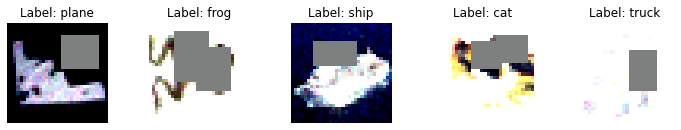

In [7]:
trainloader, testloader, classes = transform()
#Display the transformed training data.
image_display_size = 5
dataiter = iter(trainloader)
disp_images, disp_labels = dataiter.next()

# imshow(disp_images[0])
# print(disp_images[0].shape)
fig, axs = plt.subplots(1, 5, figsize=(10, 10))
fig.tight_layout()

for i in range(image_display_size):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[disp_labels[i]]}')
    axs[i].imshow(np.transpose(((disp_images[i]/2 + 0.5).numpy()), (1, 2, 0)))

##Find the optimum Learning rate using LRFinder.
This is to determine the minimum and maximum LR boundaries. 
1. start_lr=0.001 and end_lr=0.05 (exp): Steep decrease in loss observed between 0.001 and 0.01
2. start_lr = 0.001 and end_lr=0.01 (linear): Steep decrease in loss observed between 0.003 and 0.006


Files already downloaded and verified
Files already downloaded and verified
Train set
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Test set
Files already downloaded and verified
Learning rate search finished. See the graph with {finder_name}.plot()


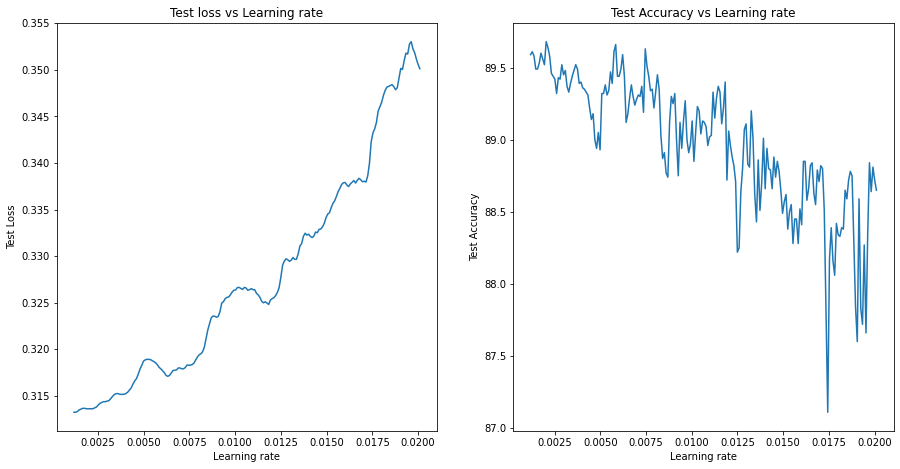

In [17]:
trainloader, testloader, classes = transform()
criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015
optimizer = optim.SGD(net.parameters(), lr=0.001, weight_decay=0.001)
lr_finder = LRFinder(net, optimizer, criterion, device)
#Run the range test
lr_finder.range_test(trainloader, testloader, end_lr=0.020, num_iter=200, step_mode="linear")
lr_finder.plot(skip_start=0, skip_end=0, log_lr=False)
lr_finder.reset()

## Model training and validation

In [8]:
EPOCHS =50
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
from torch.optim.lr_scheduler import ReduceLROnPlateau 
#import CIFAR10 data. Perform Normalize, Batching through transforms.
trainloader, testloader, classes = transform()
criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015
optimizer = optim.SGD(net.parameters(), lr=0.04, momentum=0.9, weight_decay=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True, threshold=0.001, cooldown=0, min_lr=1e-4)

for epoch in range(EPOCHS):
  print("epoch:", epoch)
  train_accuracy_delta, train_loss_delta = train(net, device, trainloader, optimizer, criterion, epoch)
  test_accuracy_delta, test_loss_delta = test(net, device, testloader, criterion)
  scheduler.step(test_loss_delta)
  train_accuracy.append(train_accuracy_delta)
  train_loss.append(train_loss_delta)
  test_accuracy.append(test_accuracy_delta)
  test_loss.append(test_loss_delta)
  
print("Train Accuracy-",train_accuracy)
print("Test Accuracy-",test_accuracy)

print("Train loss-",train_loss)
print("Test loss-",test_loss)


Files already downloaded and verified
Files already downloaded and verified
Train set
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Test set
Files already downloaded and verified
epoch: 0
[1,   300] loss: 1.937
Epoch Train loss: 1.8905046582221985         Epoch Train Accuracy: 30.594
Epoch Test loss: 1.4273884960367709         Epoch Test Accuracy: 46.53
epoch: 1
[2,   300] loss: 1.578
Epoch Train loss: 1.5540800877106495         Epoch Train Accuracy: 43.212
Epoch Test loss: 1.3576073239121256         Epoch Test Accuracy: 52.29
epoch: 2
[3,   300] loss: 1.335
Epoch Train loss: 1.316869253072983         Epoch Train Accuracy: 52.488
Epoch Test loss: 1.0765716395800626         Epoch Test Accuracy: 61.32
epoch: 3
[4,   300] loss: 1.169
Epoch Train loss: 1.1555472633777522         Epoch Train Accuracy: 58.81
Epoch Test loss: 1.1864586434786832         Epoch Test Accuracy: 59.9
epoch: 4
[5,   300] loss: 1.067
Epoch Train loss

##Loss and accuracy trend versus epoch for train and test##

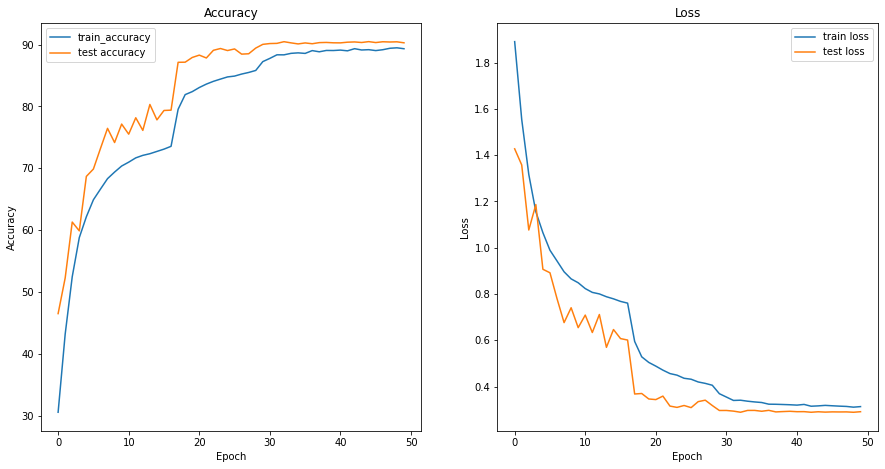

In [9]:
metrics.train_test_metrics_graph(train_accuracy, train_loss, test_accuracy, test_loss)

##To check Class activation mapping for misclassified images##

In [10]:
# Capture images, labels and predictions for misclassified samples
incorrect_labels, incorrect_predictions, incorrect_images = image_utilities.capture_correct_incorrect_classified_samples(net, device, testloader)

#Calculate mean and standard deviation of the dataset for denormalization.
stddev, means = image_utilities.dataset_calculate_mean_std()
print("Mean:", means)
print("Std Deviation:", stddev)

Files already downloaded and verified
Files already downloaded and verified
Mean: [0.4918687788500817, 0.4826539051649305, 0.44717727749693625]
Std Deviation: [0.24697121432552785, 0.24338893940435022, 0.2615925905215076]


In [11]:
cam_dict = dict()

resnet_model_dict = dict(type='resnet', arch=net, layer_name='layer4', input_size=(32, 32))
resnet_gradcam = gradcam.GradCAM(resnet_model_dict, True)
#gradcam needs normalized image. Image from capture image function is normalized.
incorrect_images = incorrect_images.to(device)

saliency_map size : torch.Size([4, 4])


Display misclassified image's class activation

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


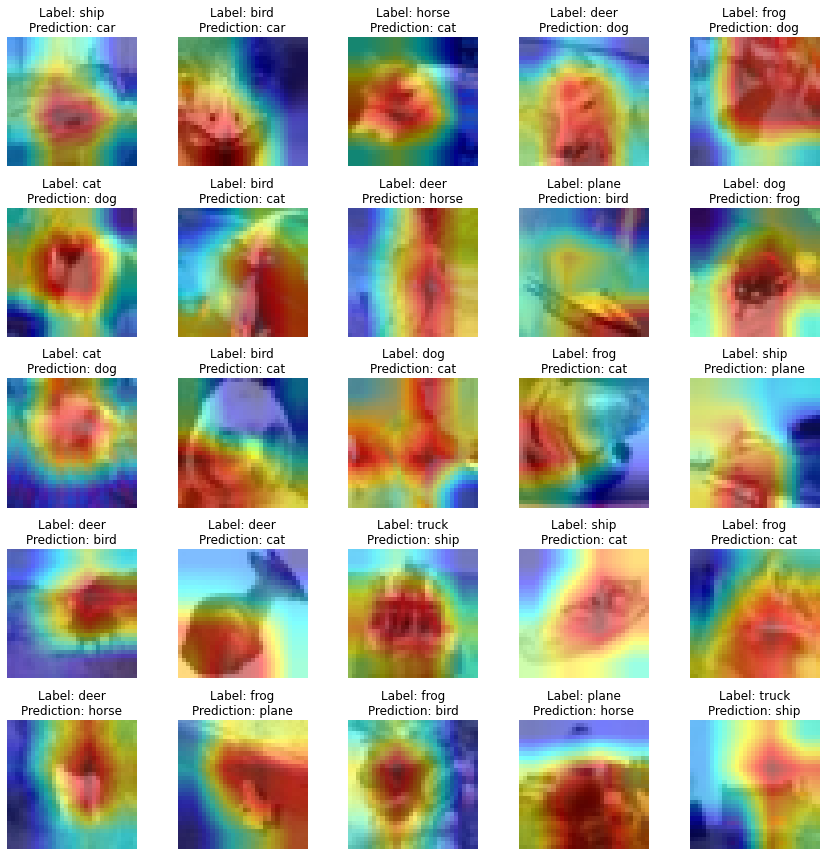

In [12]:
fig, axs = plt.subplots(5, 5, figsize=(12, 12))
fig.tight_layout()
i = 0
nrows = 5
ncols = 5
for row in range(nrows):
    for col in range(ncols):
        mask, _ = resnet_gradcam(incorrect_images[i].unsqueeze(dim=0))
        normal_image = utils.denormalize(incorrect_images[i].unsqueeze(dim=0),means,stddev)
        heatmap, result = utils.visualize_cam(mask.cpu(), normal_image)
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Label: {classes[incorrect_labels[i]]}\nPrediction: {classes[incorrect_predictions[i]]}')
        axs[row, col].imshow(np.transpose((result.numpy()), (1, 2, 0)))
        i += 1
fig.savefig("grad_cam_missclassified.jpg", bbox_inches='tight')    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

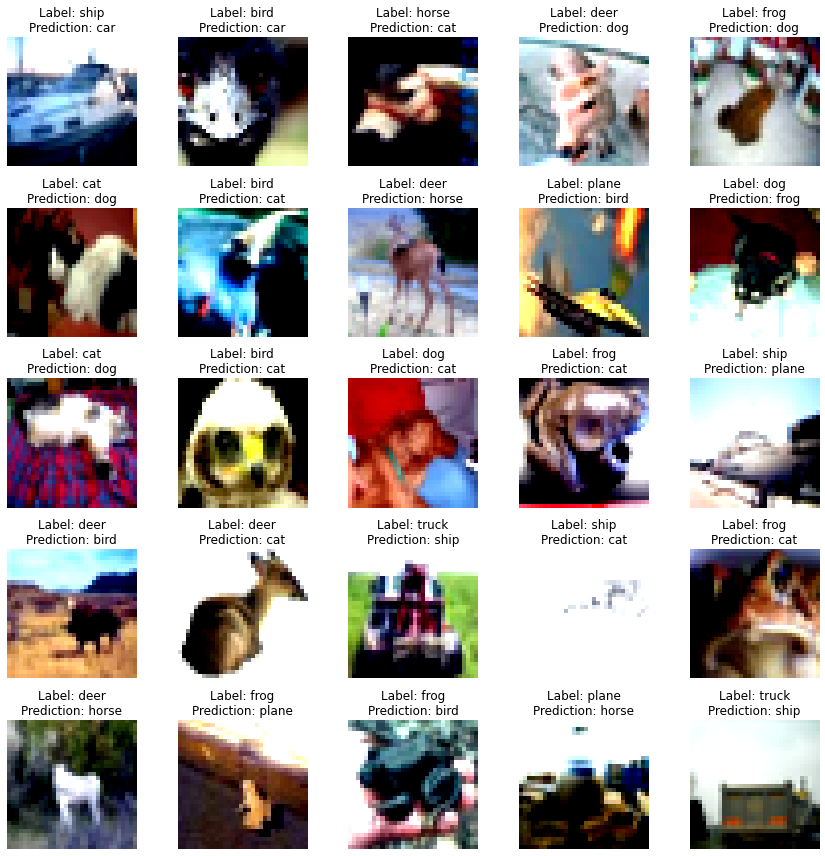

In [13]:
fig, axs = plt.subplots(5, 5, figsize=(12, 12))
fig.tight_layout()
i = 0
nrows = 5
ncols = 5
for row in range(nrows):
    for col in range(ncols):
        norm_image = utils.denormalize(incorrect_images[i].unsqueeze(dim=0),[0.5,0.5,0.5],[0.5,0.5,0.5])
        
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Label: {classes[incorrect_labels[i]]}\nPrediction: {classes[incorrect_predictions[i]]}')
        axs[row, col].imshow(np.transpose((norm_image.squeeze(dim=0).cpu().numpy()), (1, 2, 0)))
        i += 1